## Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,average_precision_score

## Data Collection

In [ ]:
df = pd.read_csv('cardio_data_processed.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


* ID: Unique identifier for each patient.
* age: Age of the patient in days.
* age_years: Age of the patient in years (derived from age).
* gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
* height: Height of the patient in centimeters.
* weight: Weight of the patient in kilograms.
* ap_hi: Systolic blood pressure.
* ap_lo: Diastolic blood pressure.
* cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
* gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
* smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
* alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
* active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
* cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
* bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
* bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
* bp_category_encoded: Encoded form of bp_category for machine learning purposes.

## Data Understanding

In [ ]:
df.drop("age", axis=1 ,inplace=True)
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [ ]:
df.drop("cardio", axis=1 ,inplace=True)
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category,bp_category_encoded
0,0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177,Normal,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
#check for missing data
df.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
#check for duplicated entries
df.duplicated().sum()

0

# Data Preprocessing



In [ ]:
#drop bp_category and id

df =df.drop('bp_category',axis=1)
df = df.drop('id',axis=1)

In [ ]:
#Apply ordinal encoder to labels to prep for ANN
bp_categories = ['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']
enc = OrdinalEncoder()
df['bp_category_encoded']=enc.fit_transform(df[['bp_category_encoded']])

df['bp_category_encoded']=df['bp_category_encoded'].apply(lambda x: int(x))

In [ ]:
df['bp_category_encoded'].value_counts()

,count
bp_category_encoded,
1,39750
2,15937
3,9417
0,3101


In [ ]:
#Split features and label
X = df.drop('bp_category_encoded',axis=1)
y = df['bp_category_encoded']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((54564, 12), (13641, 12), (54564,), (13641,))

In [ ]:
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# ML

In [ ]:
from sklearn.linear_model import LogisticRegression

LOG_model=LogisticRegression()
LOG_model.fit(x_train,y_train)
log_pred=LOG_model.predict(x_test)

accuracy=accuracy_score(y_test,log_pred)

print("Accuracy=",accuracy*100,'%')

Accuracy= 91.92141338611539 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Classifier Accuracy =", accuracy * 100, '%')

Decision Tree Classifier Accuracy = 100.0 %


In [ ]:
def predict_hypertension_class(age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_years, bmi, model, scaler):
    features = np.array([[age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_years, bmi]])
    scaled_features = scaler.transform(features)
    prediction = model.predict(scaled_features)
    return prediction

print(predict_hypertension_class(23317, 2, 168, 78.0, 120, 80, 1, 1, 0, 0, 1, 1, 63, 27.63, dt_model, scaler))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

with open('model2', 'wb') as f:
    pickle.dump(dt_model, f)

# Model 0 | PRIME ANARCHIST

In [ ]:
X.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177


In [ ]:
tf.random.set_seed(10)

model = Sequential([
    InputLayer(input_shape=[12,]),
    Dense(14,activation='relu'),
    Dense(14,activation='relu'),
    Dense(4, activation='softmax'),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    validation_data=[x_test,y_test])

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1706/1706 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6853 - loss: 0.7835 - val_accuracy: 0.9033 - val_loss: 0.3150
Epoch 2/25
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9054 - loss: 0.2946 - val_accuracy: 0.9239 - val_loss: 0.2846
Epoch 3/25
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9219 - loss: 0.2683 - val_accuracy: 0.9221 - val_loss: 0.2624
Epoch 4/25
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9226 - loss: 0.2474 - val_accuracy: 0.9103 - val_loss: 0.2420
Epoch 5/25
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9196 - loss: 0.2263 - val_accuracy: 0.9038 - val_loss: 0.2199
Epoch 6/25
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9187 - loss: 0.2064 - val_accuracy: 0.9044 - val_loss: 0.2026
Epoch 7/25
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9240 - loss: 0.1907 - val_accuracy: 0.9095 - val_loss: 0.1889
Epoch 8/25
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9274 - loss: 0.1767 - val_accurac

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 14)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,358 (5.31 KB)

 Trainable params: 452 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 906 (3.54 KB)

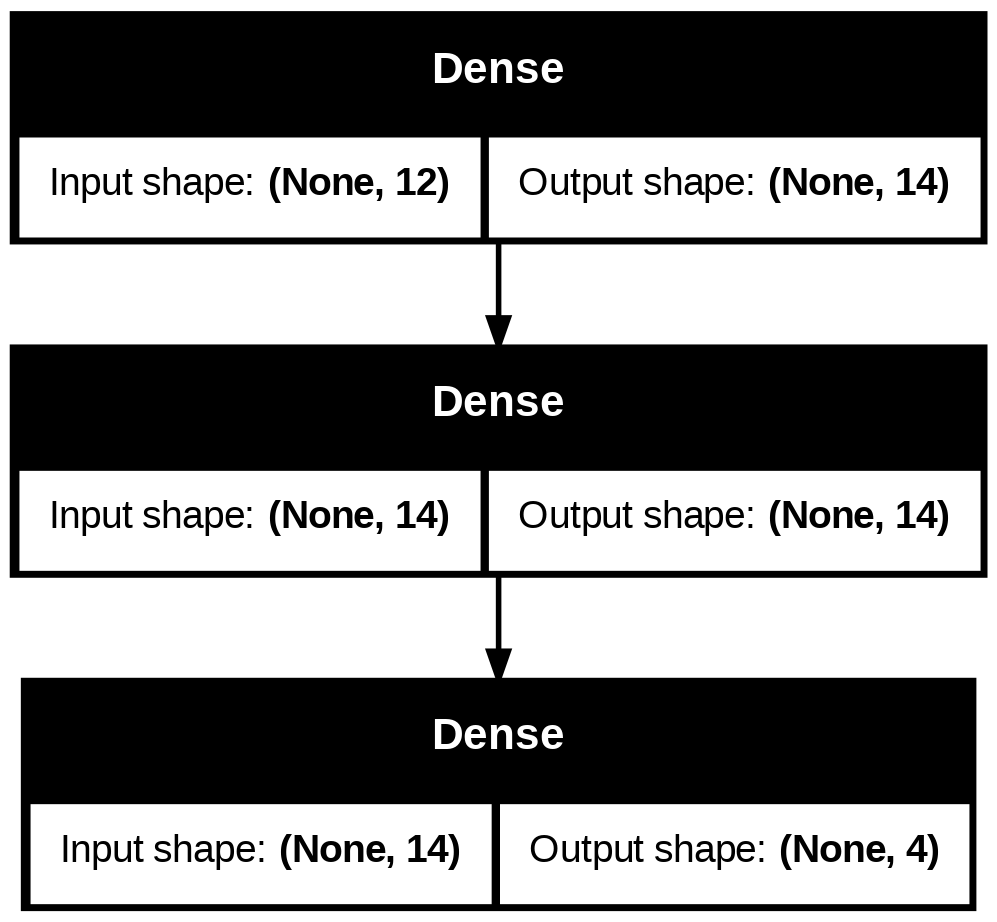

In [ ]:
plot_model(model,show_shapes=True)

<Axes: title={'center': 'Accuracy curve'}>

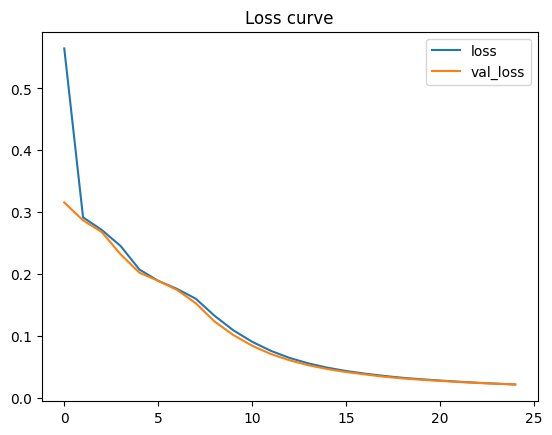

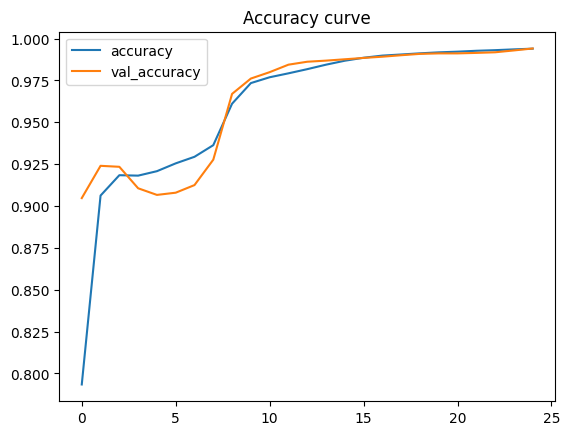

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
losses = pd.DataFrame({'loss':loss,'val_loss':val_loss})

accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
acc = pd.DataFrame({'accuracy':accuracy,'val_accuracy':val_accuracy})


losses.plot(title='Loss curve')
acc.plot(title='Accuracy curve')

# Evaluating the model

In [ ]:
loss,acc = model.evaluate(x_test,y_test)
print(f"Model loss: {loss:.3f}")
print(f"Model accuracy: {acc*100:.2f}%")

427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9934 - loss: 0.0220
Model loss: 0.021
Model accuracy: 99.41%


In [ ]:
y_probs = model.predict(x_test)
y_preds = tf.argmax(y_probs,axis=1)

427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
(y_test.dtype, y_preds.dtype)

(dtype('int64'), tf.int64)

In [ ]:
acc_score=accuracy_score(y_test,y_preds.numpy())

print(classification_report(y_test,y_preds))
print(f'Accuracy is {acc_score*100:.2f}%')

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       598
           1       0.99      1.00      1.00      7924
           2       0.99      0.99      0.99      3225
           3       1.00      1.00      1.00      1894

    accuracy                           0.99     13641
   macro avg       0.99      0.99      0.99     13641
weighted avg       0.99      0.99      0.99     13641

Accuracy is 99.41%


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Elevated'),
  Text(2, 0, 'Hypertension Stage 1'),
  Text(3, 0, 'Hypertension Stage 2')])

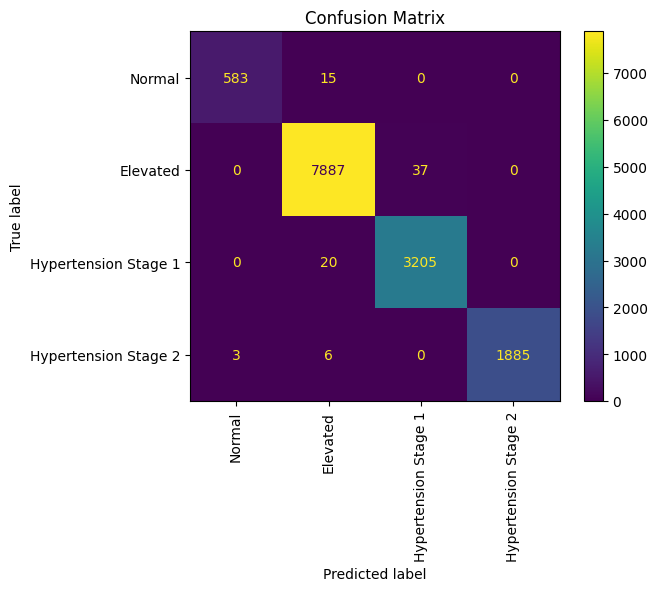

In [ ]:
cm = confusion_matrix(y_test,y_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bp_categories)
disp.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Correlation between features')

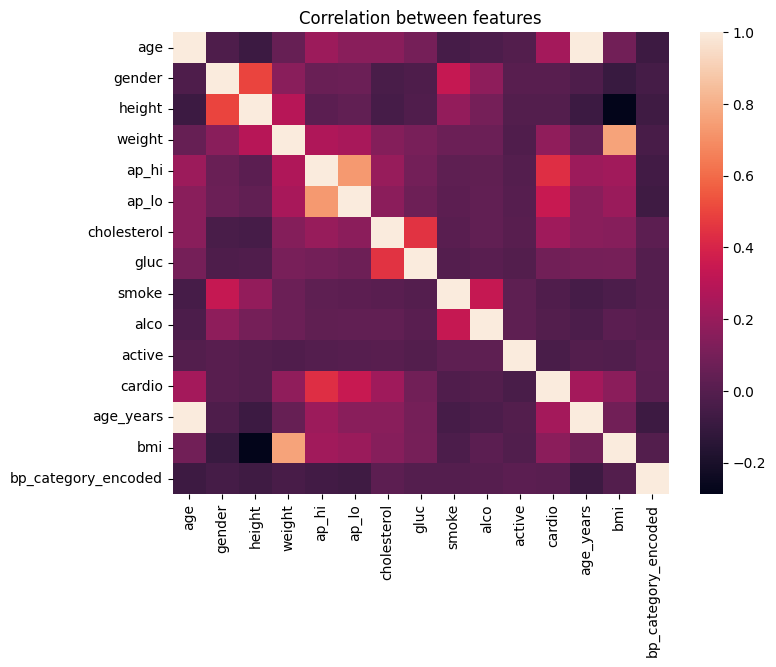

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.title('Correlation between features')

Text(0.5, 1.0, "Features' correlation to the label")

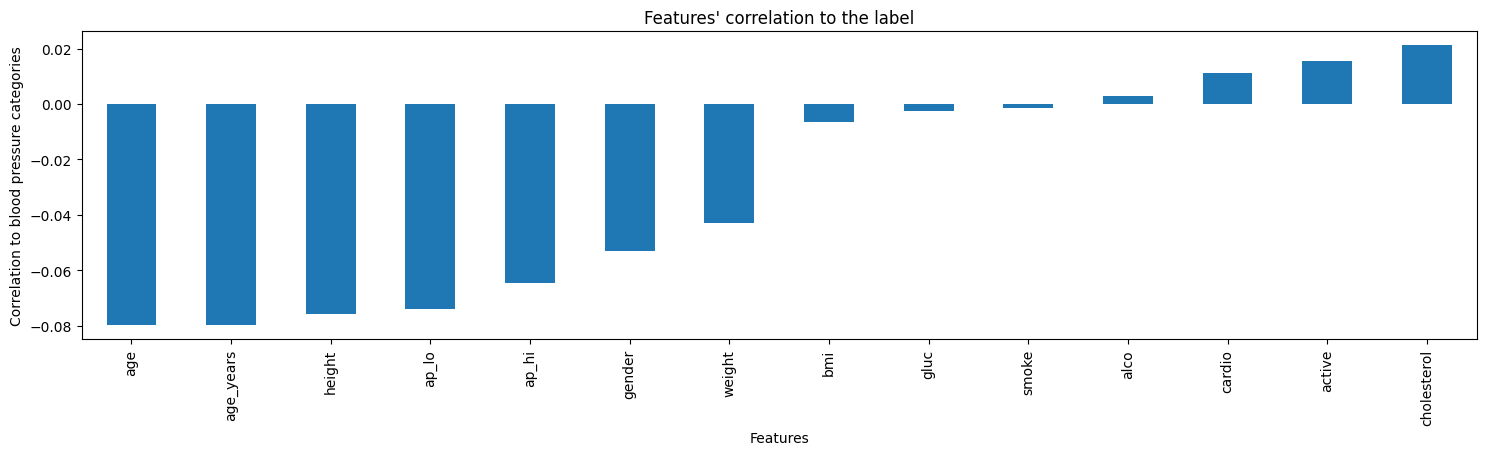

In [ ]:
plt.figure(figsize=(18,4))
df.corr()['bp_category_encoded'][:-1].sort_values(ascending = True).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation to blood pressure categories')
plt.title('Features\' correlation to the label')